In [105]:
import matplotlib.pyplot as plt
import numpy as np
import sqlite3
import pandas as pd
from pandas import DataFrame

In [106]:
jongmok = ['동화약품','우리은행']
con = sqlite3.connect("./kospi.db")
df_codelist = pd.read_sql("SELECT * FROM codelist", con, index_col=None)
df_codelist

,name,code
0,동화약품,000020
1,우리은행,000030
2,KR모터스,000040
3,경방,000050
4,메리츠화재,000060
5,삼양홀딩스,000070
6,삼양홀딩스우,000075
7,하이트진로,000080
8,하이트진로2우B,000087
9,유한양행,000100


In [107]:
selected = df_codelist.loc[df_codelist['name'].isin(jongmok)]

b = [590012, 900140] #isin은 str에 list형식
d = ["000020", "000080"]
a = df_codelist.loc[df_codelist['code'].isin(b)]
c = df_codelist.loc[df_codelist['code'].isin(d)]
print(a) # int
c # str

Empty DataFrame
Columns: [name, code]
Index: []


,name,code
0,동화약품,000020
7,하이트진로,000080


In [108]:
selected

,name,code
0,동화약품,000020
1,우리은행,000030


In [109]:
selected['name']

0    동화약품
1    우리은행
Name: name, dtype: object

In [110]:
selected = df_codelist.loc[df_codelist['name'].isin(jongmok)] #주가 데이터 불러와서
#name에 있는지 확인 후 있으면 selected에 넣음
print(selected)

selected['name'] = selected['name'].astype('category') #astype은 형변환 ex) astype('float32')
selected['name'].cat.set_categories(jongmok, inplace=True) #카테고리형으로 변경
selected.sort_values(['name'], inplace=True)
selected.reset_index(drop=True, inplace=True)

dfs = {} 
for i, row in selected.iterrows():
    db_name = "SELECT * FROM "+"'"+row['code']+"'"
    dfs['{}'.format(row['name'])] = pd.read_sql(db_name, con, index_col=None)
#con이 위에 주가 리스트
df = dfs['동화약품']
df2 = dfs['우리은행']

print(df) #동화약품 주가
print(df2) #우리은행 주가
#빨간색은 warning 딱히 신경 x

   name    code
0  동화약품  000020
1  우리은행  000030
                    Date     Open     High      Low    Close     Adj Close  \
0    2015-01-02 00:00:00   5450.0   5570.0   5450.0   5530.0   5312.048340   
1    2015-01-05 00:00:00   5430.0   5590.0   5400.0   5500.0   5283.230957   
2    2015-01-06 00:00:00   5480.0   5570.0   5450.0   5470.0   5254.413574   
3    2015-01-07 00:00:00   5470.0   5580.0   5400.0   5540.0   5321.654297   
4    2015-01-08 00:00:00   5550.0   5600.0   5400.0   5500.0   5283.230957   
5    2015-01-09 00:00:00   5550.0   5580.0   5490.0   5540.0   5321.654297   
6    2015-01-12 00:00:00   5540.0   5660.0   5540.0   5560.0   5340.865723   
7    2015-01-13 00:00:00   5560.0   5640.0   5550.0   5600.0   5379.289551   
8    2015-01-14 00:00:00   5680.0   5790.0   5650.0   5720.0   5494.560059   
9    2015-01-15 00:00:00   5730.0   5800.0   5630.0   5750.0   5523.377441   
10   2015-01-16 00:00:00   5750.0   5750.0   5520.0   5640.0   5417.712891   
11   2015-01-19 

C:\Users\haedal\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\haedal\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [111]:
df['Date'] = df['Date'].str.rstrip('00:00:00') #오른쪽끝에서 자름 / 00:00:00 필요없는 부분 자름
df2['Date'] = df2['Date'].str.rstrip('00:00:00') #lstrip = 왼쪽끝에서 데이터를 자름
#str은 판다스 시리즈에만 있음 / 시리즈가 붙어서 데이터프레임이 됨 / 
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,5450.0,5570.0,5450.0,5530.0,5312.048340,48783
1,2015-01-05,5430.0,5590.0,5400.0,5500.0,5283.230957,47278
2,2015-01-06,5480.0,5570.0,5450.0,5470.0,5254.413574,49260
3,2015-01-07,5470.0,5580.0,5400.0,5540.0,5321.654297,42517
4,2015-01-08,5550.0,5600.0,5400.0,5500.0,5283.230957,65098
5,2015-01-09,5550.0,5580.0,5490.0,5540.0,5321.654297,78677
6,2015-01-12,5540.0,5660.0,5540.0,5560.0,5340.865723,42854
7,2015-01-13,5560.0,5640.0,5550.0,5600.0,5379.289551,39527
8,2015-01-14,5680.0,5790.0,5650.0,5720.0,5494.560059,83171
9,2015-01-15,5730.0,5800.0,5630.0,5750.0,5523.377441,38536


In [112]:
del df['Adj Close']
df

,Date,Open,High,Low,Close,Volume
0,2015-01-02,5450.0,5570.0,5450.0,5530.0,48783
1,2015-01-05,5430.0,5590.0,5400.0,5500.0,47278
2,2015-01-06,5480.0,5570.0,5450.0,5470.0,49260
3,2015-01-07,5470.0,5580.0,5400.0,5540.0,42517
4,2015-01-08,5550.0,5600.0,5400.0,5500.0,65098
5,2015-01-09,5550.0,5580.0,5490.0,5540.0,78677
6,2015-01-12,5540.0,5660.0,5540.0,5560.0,42854
7,2015-01-13,5560.0,5640.0,5550.0,5600.0,39527
8,2015-01-14,5680.0,5790.0,5650.0,5720.0,83171
9,2015-01-15,5730.0,5800.0,5630.0,5750.0,38536


In [113]:
df['Var'] = df['Close'] - df['Open'] #Var 추가
df

,Date,Open,High,Low,Close,Volume,Var
0,2015-01-02,5450.0,5570.0,5450.0,5530.0,48783,80.0
1,2015-01-05,5430.0,5590.0,5400.0,5500.0,47278,70.0
2,2015-01-06,5480.0,5570.0,5450.0,5470.0,49260,-10.0
3,2015-01-07,5470.0,5580.0,5400.0,5540.0,42517,70.0
4,2015-01-08,5550.0,5600.0,5400.0,5500.0,65098,-50.0
5,2015-01-09,5550.0,5580.0,5490.0,5540.0,78677,-10.0
6,2015-01-12,5540.0,5660.0,5540.0,5560.0,42854,20.0
7,2015-01-13,5560.0,5640.0,5550.0,5600.0,39527,40.0
8,2015-01-14,5680.0,5790.0,5650.0,5720.0,83171,40.0
9,2015-01-15,5730.0,5800.0,5630.0,5750.0,38536,20.0


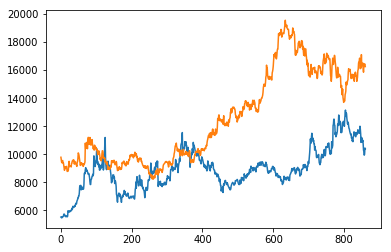

In [114]:
plt.plot(df.index, df['Close']) #첫번째인자 x축, 두번째가 y축
plt.plot(df2.index, df2['Close']) #x = 0~860까지, y는 종가

plt.show()

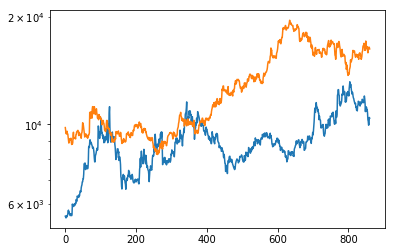

In [115]:
plt.plot(df.index, df['Close'])
plt.plot(df2.index, df2['Close'])

plt.yscale('log') #y축에 log scale
#plt.xscale('log') #x축

plt.show()

In [116]:
somelist = list(df.index)
somelist

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


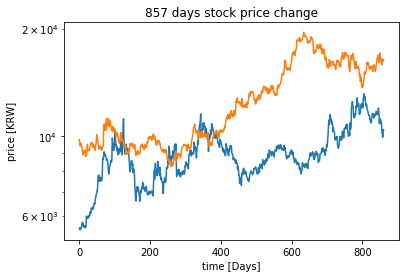

In [117]:
xlab = 'time [Days]' #x축에 이름지정
ylab = 'price [KRW]' #y축
title = '857 days stock price change' #title

plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)

plt.plot(df.index, df['Close'])
plt.plot(df2.index, df2['Close'])
#plt.plot(df['Date'], df['Close']) #df.Date .으로 접근 가능
#plt.plot(df2['Date'], df2['Close'])

plt.yscale('log')

plt.show()

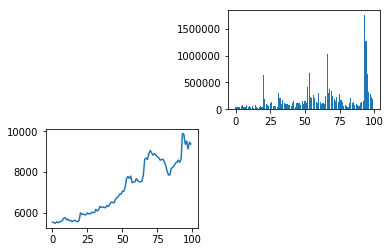

In [122]:
df = df[0:100]
df2 = df2[0:100]

#ex) 2,2,1 2x2 matrix해서 1 2
#                         3 4
plt.subplot(2,2,3) #인자는 위치 (row, columns, 위치 / 그래프를 한번에 여러개 띄울때
plt.plot(df.index, df['Close']) #index , 종가 그래프

plt.subplot(2,2,2)
plt.bar(df.index, df['Volume']) #index , 거래량


plt.show() #같이 띄우려면 써야함 / 안쓰면 한개만 보임

In [125]:
red_idx = df['Var']<0  #df['Var'] = df['Close'] - df['Open']
print(red_idx)
black_idx = df['Var']>=0 
color = np.full(100, '', dtype=str) #100칸의 color를 ''공백으로 채움 / 숫자는 오류가 나옴
#array 는 하나의 자료형만 가지고 있어야함 
color[red_idx] = 'r' #0보다 작으면 r
color[black_idx] = 'k' #0과같거나 크면 k로 채움
#pandas 1-3의 마지막 c=y에서 color를 지정하려고 씀
print(color)

0     False
1     False
2      True
3     False
4      True
5      True
6     False
7     False
8     False
9     False
10     True
11    False
12     True
13    False
14     True
15    False
16     True
17     True
18    False
19    False
20    False
21     True
22    False
23     True
24    False
25    False
26    False
27     True
28    False
29     True
      ...  
70    False
71     True
72     True
73    False
74     True
75     True
76     True
77     True
78     True
79    False
80     True
81     True
82     True
83    False
84    False
85    False
86    False
87    False
88    False
89    False
90    False
91     True
92    False
93    False
94     True
95     True
96    False
97     True
98    False
99     True
Name: Var, Length: 100, dtype: bool
['k' 'k' 'r' 'k' 'r' 'r' 'k' 'k' 'k' 'k' 'r' 'k' 'r' 'k' 'r' 'k' 'r' 'r'
 'k' 'k' 'k' 'r' 'k' 'r' 'k' 'k' 'k' 'r' 'k' 'r' 'k' 'k' 'r' 'k' 'k' 'r'
 'k' 'r' 'r' 'k' 'r' 'k' 'k' 'k' 'r' 'k' 'k' 'k' 'k' 'r' 'k' 'r' 'k' 'k'
 'k' 'r' 'k' 

In [126]:
!pip install mpl_finance

distributed 1.21.8 requires msgpack, which is not installed.


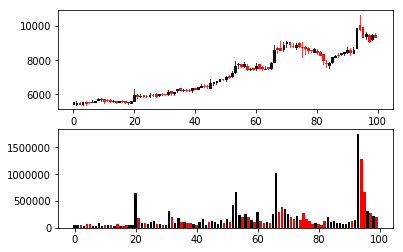

In [133]:
from mpl_finance import candlestick2_ohlc #캔들차트

ax = plt.subplot(2, 1, 1)
candlestick2_ohlc(ax, df['Open'],df['High'],df['Low'],df['Close'],width=0.6)

plt.subplot(2,1,2)
plt.bar(df.index, df['Volume'], color=color) #여기 색을 빼면 파란색으로 나옴

plt.show()

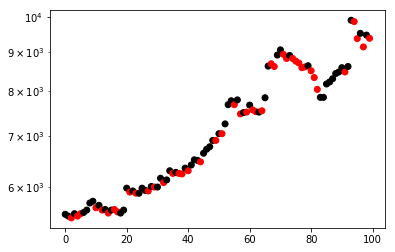

In [143]:
plt.scatter(df.index, df['Close'], c=color) #scatter plot임 / x값, y값, color

plt.yscale('log') #y를 log scale로

plt.show() #2차원임

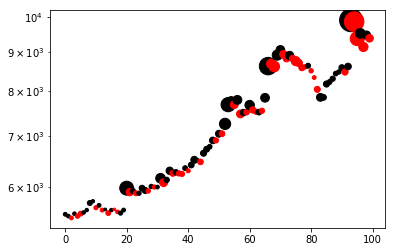

In [140]:
vol = np.array(df['Volume']*0.0005) #volume에 
plt.scatter(df.index, df['Close'], s=vol, c=color) #s는 size / 3차원임 크기때문에 볼륨감

plt.yscale('log')#주가가 급등할때 볼륨도 같이 커짐

plt.show()

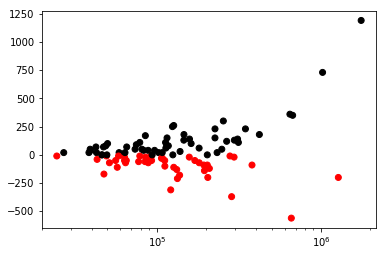

In [142]:
plt.scatter(df['Volume'], df['Var'], c=color)
plt.xscale('log')
plt.show()

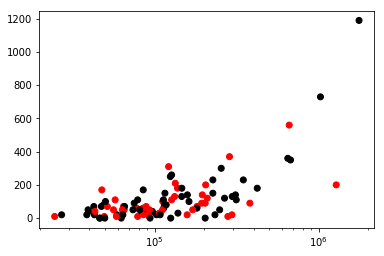

In [145]:
df['Var'] = df['Var'].abs() #absolute 절댓값을 취함

plt.scatter(df['Volume'], df['Var'], c=color) # = df.volume 
plt.xscale('log')
plt.show()

(100, 2)
0.0005259579376875322 17.128845849800022


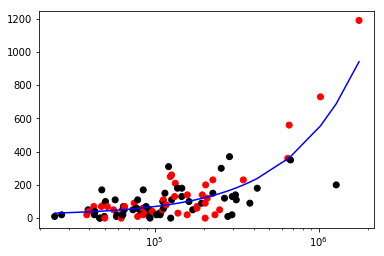

In [166]:
x = np.array(df['Volume'])
y = np.array(df['Var']) #(100,1)
#다r linaer regression 선형회귀
# A = (100,2)
# np.vstack([x, np.ones(len(x))]) = (2,100)이라서 T
A = np.vstack([x, np.ones(len(x))]).T #x길이만큼 1로 채움
#vstack 명령은 열의 수가 같은 두 개 이상의 배열을 위아래로 연결하여 
#행의 수가 더 많은 배열을 만든다. 연결할 배열은 마찬가지로 하나의 리스트에 담아야 한다.
print(x.shape)
print(A.shape)

m, c = np.linalg.lstsq(A, y, rcond=None)[0]

print(m, c) #(2,1)
#print(df.Volume)
df = df.sort_values(by=['Volume']) #이걸로 다시
#df.Volume = sorted(df.Volume) #2. 그래서 정렬! / x,y 같이 바꿔야함
plt.scatter(df['Volume'], df['Var'], c=color) #1. x축을 df.Volum을 쓰는데 이 값들이 왔다갔다해서 선이 여러개로 나옴
plt.plot(x, m*x + c, 'b') #여기가 직선

plt.xscale('log') #log scale을 취해서 직선이 휘어짐
plt.show()

In [169]:
a = np.random.randn(10,2)
b = np.random.randn(2,10)
c = np.vstack([a, np.ones(len(b))]) #하나의 리스트에 / 기준 행 개수 +1
print(np.ones(len(b)).shape)
d = np.vstack([b, np.ones(len(a))]) 
print(np.ones(len(b)).shape)

print(a.shape)
print(b.shape)
print(c.shape)
print(d.shape)

(2,)
(2,)
(10, 2)
(2, 10)
(11, 2)
(3, 10)


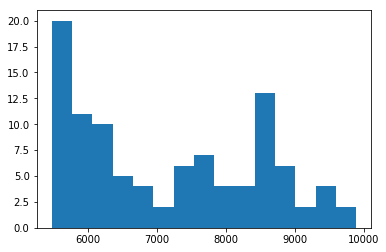

In [164]:
plt.hist(df['Close'], bins=15)

plt.show()